## Comprehend

### setup

In [5]:
import boto3
import pandas as pd
from dotenv import load_dotenv

load_dotenv('../.env')

True

In [3]:
comprehend_client = boto3.client('comprehend')
s3_client = boto3.client('s3')

### read csv

In [19]:
df = pd.read_csv('../Comprehend/sample.csv')
df.head()

,textID,text,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,910d626cd8,"Come on bell, RING. I want to go outside.",noon,60-70,Moldova,4033963,32850.0,123
1,8560ce3f2e,Hey,morning,0-20,Bosnia and Herzegovina,3280819,51000.0,64
2,eca4006095,"I started X-Slimmer at eight this morning, it`...",morning,46-60,Ukraine,43733762,579320.0,75
3,5b34c6a158,"no, i do better with people i don`t know yo...",noon,60-70,Libya,6871292,1759540.0,4
4,4349a49444,the end when they sing this is me and when th...,noon,60-70,Uruguay,3473730,175020.0,20


### sentiments

In [20]:
sentiments = []
for text in df['text']:
    response = comprehend_client.detect_sentiment(
        Text=text,
        LanguageCode='en'
    )
    sentiments.append(response['Sentiment'])

df['sentiment'] = sentiments
df.head()

,textID,text,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),sentiment
0,910d626cd8,"Come on bell, RING. I want to go outside.",noon,60-70,Moldova,4033963,32850.0,123,POSITIVE
1,8560ce3f2e,Hey,morning,0-20,Bosnia and Herzegovina,3280819,51000.0,64,NEUTRAL
2,eca4006095,"I started X-Slimmer at eight this morning, it`...",morning,46-60,Ukraine,43733762,579320.0,75,NEGATIVE
3,5b34c6a158,"no, i do better with people i don`t know yo...",noon,60-70,Libya,6871292,1759540.0,4,NEGATIVE
4,4349a49444,the end when they sing this is me and when th...,noon,60-70,Uruguay,3473730,175020.0,20,POSITIVE


In [21]:
df.to_csv('output.csv', index=False)

### upload output to s3 

In [22]:
import awswrangler as wr
wr.s3.upload(local_file='output.csv', path='s3://techcatalyst-raw/fabiola/sentiment/output.csv')

### visualization

Text(0.5, 1.0, 'Sentiment Distribution')

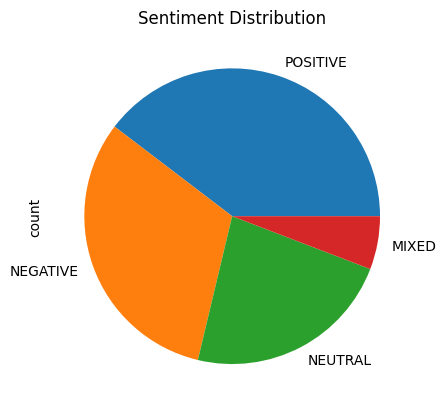

In [23]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='pie')
plt.title('Sentiment Distribution')

In [25]:
plt.savefig('sentiment_distribution.png')

<Figure size 640x480 with 0 Axes>

In [27]:
wr.s3.upload(local_file='sentiment_distribution.png',path='s3://techcatalyst-raw/fabiola/sentiment/sentiment_distribution.png')